In [2]:
import keras
from keras.datasets import mnist
import numpy as np
data = mnist.load_data()
#print (data[0][0].shape)


In [3]:
# iarr = np.identity(10)
# y = np.array([0, 3, 5])
# print (iarr)
# print (iarr[y, ])

In [28]:
(x_train, y_train), (x_test, y_test) = data

class SequenceExample(keras.utils.Sequence):

    def __init__(self, x, y, batch_size, len=-1, flatten = True, shuffle=False, split=True, sv = 0.1):
        self.classes = 10 
        self.y = y  
        self.split = split 
        self.flatten = flatten
        self.batch_size = batch_size
        self.shuffle = shuffle
        
        #flatten is reversed if you want flatten then make it false 
        
        if flatten:
            arr = x.reshape((x.shape[0], x.shape[1], x.shape[2])).astype('float32')/255
        else :
            arr = x.reshape((x.shape[0], x.shape[1]*x.shape[2])).astype('float32')/255
            
        if self.split:
            if flatten: 
                self.x = arr[0:int(x.shape[0]*sv), :, :, np.newaxis]
            else: 
                self.x = arr[0:int(x.shape[0]*sv), :]
            self.datalen = int(x.shape[0]*sv) if len == -1 else len
        else: 
            if flatten: 
                self.x = arr[0:int(x.shape[0]*(1-sv)), :, :, np.newaxis]
            else: 
                self.x = arr[0:int(x.shape[0]*(1-sv)), :]
            self.datalen = int(x.shape[0]*(1-sv)) if len == -1 else len
            
        self.indexes = np.arange(self.datalen)
            
        if self.shuffle:
            np.random.shuffle(self.indexes)
            
    def __getitem__(self, index):
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        x_batch = self.x[batch_indexes]
        y_tmp = self.y[batch_indexes]
        iarr = np.identity(self.classes)
        y_batch = iarr[y_tmp, ]
        #print(y_batch.shape)
        assert y_batch.shape == (self.batch_size, self.classes)
        return x_batch, y_batch
    
    def __len__(self):
        return self.datalen // self.batch_size

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)


In [34]:
train_gen = SequenceExample(x_train, y_train, batch_size=5000, split=False)
val_gen = SequenceExample(x_train, y_train, batch_size=5000, split=True)
test_gen = SequenceExample(x_test, y_test, batch_size=5000, split=False)

print (train_gen.__len__(), test_gen.__len__())
print (train_gen.__getitem__(0)[0].shape)

10 1
(5000, 28, 28, 1)


In [38]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#model = Sequential()
# model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(10, activation = 'softmax'))
# model.compile(optimizer = 'Adam',
#               loss = "categorical_crossentropy",
#               metrics = 'accuracy')
n_classes = 10
input_shape = (28, 28)
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28 , 1))) #3 by 3 pixel multiplied by weights and added with a bias - easier to analyze image 
model.add(MaxPooling2D(pool_size=(2, 2))) #max value of each 2 by 2 square 
model.add(Conv2D(32, (3, 3), activation='relu')) #3 by 3 pixel analyzing again 
model.add(MaxPooling2D(pool_size=(2, 2)))#max value of each 2 by 2 square 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 800)              

In [39]:
#model.fit(train_gen, validation_data=val_gen, epochs = 20)
steps_per_epoch = len(train_gen)
validation_steps = len(val_gen)

model.fit_generator(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_data=val_gen,
        validation_steps=validation_steps)


Epoch 1/10


C:\Users\Agraw\AppData\Local\Temp\ipykernel_20024\497141403.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


10/10 [==============================] - 12s 979ms/step - loss: 2.1085 - accuracy: 0.3093 - val_loss: 1.5577 - val_accuracy: 0.7424
Epoch 2/10
10/10 [==============================] - 9s 924ms/step - loss: 1.2872 - accuracy: 0.6025 - val_loss: 0.5974 - val_accuracy: 0.8472
Epoch 3/10
10/10 [==============================] - 9s 951ms/step - loss: 0.7158 - accuracy: 0.7725 - val_loss: 0.3571 - val_accuracy: 0.8964
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.4903 - accuracy: 0.8482 - val_loss: 0.2536 - val_accuracy: 0.9308
Epoch 5/10
10/10 [==============================] - 9s 917ms/step - loss: 0.3796 - accuracy: 0.8855 - val_loss: 0.1993 - val_accuracy: 0.9448
Epoch 6/10
10/10 [==============================] - 10s 962ms/step - loss: 0.3089 - accuracy: 0.9061 - val_loss: 0.1600 - val_accuracy: 0.9548
Epoch 7/10
10/10 [==============================] - 9s 930ms/step - loss: 0.2614 - accuracy: 0.9200 - val_loss: 0.1379 - val_accuracy: 0.9600
Epoch 8/10
10/10 

c:\Users\Agraw\miniconda3\envs\flow\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


157/157 [==============================] - 1s 4ms/step
[[455   0   1   0   0   1   1   0   2   0]
 [  0 564   3   1   0   0   2   0   1   0]
 [  4   1 514   1   1   0   0   4   5   0]
 [  1   0   5 478   0   5   0   6   2   3]
 [  0   1   2   0 477   0   3   1   2  14]
 [  5   0   1   5   0 430   1   1   9   4]
 [  8   2   1   0   1   3 445   0   2   0]
 [  0   3  14   3   1   0   0 479   4   8]
 [  8   0   3   6   3   0   0   5 459   5]
 [  5   7   0   3   6   1   0   3   2 493]]


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (2).

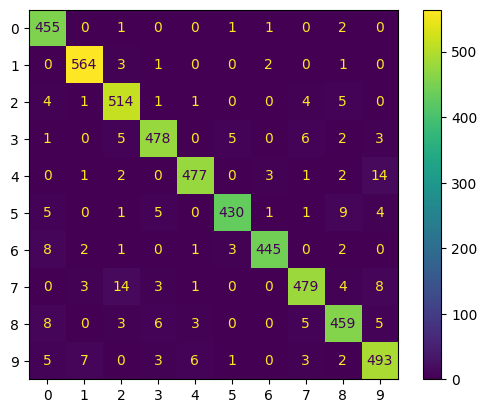

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, roc_auc_score, f1_score, roc_curve

x_test, y_test = test_gen.__getitem__(0)
y_pred=model.predict(x_test) 
y_pred2=np.argmax(y_pred, axis=1)
y_test2=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test2, y_pred2)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()